# Test: Animated population plots

In [8]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
from IPython.display import HTML
sns.set_context('paper')

Load data:

In [9]:
migration_data = pd.read_csv('../outputs/all_lifelogs_compact.tsv', sep='\t', index_col = None)
migration_data.head()

,Unnamed: 0,release,era,hash,playerID,tBirth,parent,birth,tDeath,death,age,cause_of_death,birthX,birthY,deathX,deathY,first,last
0,0,342.0,boundless,2cdc4d0b016f9c0d96d27013f1d19c42596e0c5c,3080130,1592288229,3080111,[-454640 41],1592288538,[-454625 49],5.14,hunger,-454640,41,-454625,49,CLAUDINE,P
1,1,342.0,boundless,a8b5975a81344f690f45ffc2554a0bc35af557a9,3080128,1592288191,3080105,[-454394 -4],1592291791,[-454383 15],60.00,oldAge,-454394,-4,-454383,15,DACY,LIGHTNING
2,2,342.0,boundless,c5838da39fd525a2ac24aee049dae6a42e502236,3080125,1592288138,3080101,[-311131 -322],1592291738,[-311112 -325],59.98,hunger,-311131,-322,-311112,-325,SHOKO,GREATHOUSE
3,3,342.0,boundless,11f9fce50bbc1ebbba5126434aea123e79249942,3080122,1592288029,3080104,[-454638 41],1592288696,[-454647 58],11.12,hunger,-454638,41,-454647,58,RANGER,PICKLE
4,4,342.0,boundless,b265b1958566b474094cf0282a0fa59e6d622885,3080120,1592287917,3080101,[-311111 -311],1592291365,[-311115 -66],57.46,hunger,-311111,-311,-311115,-66,HAPPY,GREATHOUSE


# "Popcorn" plot

### Select a subset of the data

Choose a release to test out this visualization, and subset the data:

In [10]:
r = 299

migration_sub = migration_data[migration_data['release'] == r].reset_index(drop=True)
migration_sub = migration_sub.sort_values(by='tBirth')
migration_sub.head()

,Unnamed: 0,release,era,hash,playerID,tBirth,parent,birth,tDeath,death,age,cause_of_death,birthX,birthY,deathX,deathY,first,last
45427,384911,299.0,boundless,c0ad98c5a08626a24e4329ac1dc800cf9ec0ba32,2441665,1576886448,2441575,[-47447 -89],1576889924,[-47430 -71],57.94,hunger,-47447,-89,-47430,-71,PEACE,EIS
45426,384910,299.0,boundless,0f2581e25a68779fe77cec28d452e69a083a9643,2441666,1576886477,2441554,[-49351 -771],1576888607,[-47840 -493],35.50,hunger,-49351,-771,-47840,-493,MERLIN,WHISLER
45425,384909,299.0,boundless,dedb8a85f366f2c5e52ff68a515228ee3ee5eae8,2441667,1576886500,2441544,[-49313 -747],1576890100,[-49298 -756],60.00,oldAge,-49313,-747,-49298,-756,FURY,WHISLER
45424,384908,299.0,boundless,d3529d4752d1f8fd3ea1f6d79f8709011f70dee2,2441668,1576886501,2441557,[-49233 -832],1576886897,[-49311 -759],6.61,hunger,-49233,-832,-49311,-759,SAMUEL,WHISLER
45423,384907,299.0,boundless,7cbeb571e9e7f744cd6d41537137d2b7cf1063b4,2441669,1576886502,2441548,[-46391 -277],1576888072,[-46733 -81],26.17,hunger,-46391,-277,-46733,-81,ARRYN,SELIN


### Prepare data for plotting

Mark start and end times for each point:

In [11]:
# Calculate start and end times
migration_sub['t_start'] = migration_sub['tBirth'] - min(migration_sub['tBirth'])
migration_sub['t_end'] = migration_sub['tDeath'] - min(migration_sub['tBirth'])

# Convert to integer
migration_sub['t_start'] = migration_sub['t_start'].astype(np.int)

In [12]:
migration_sub.head()

,Unnamed: 0,release,era,hash,playerID,tBirth,parent,birth,tDeath,death,age,cause_of_death,birthX,birthY,deathX,deathY,first,last,t_start,t_end
45427,384911,299.0,boundless,c0ad98c5a08626a24e4329ac1dc800cf9ec0ba32,2441665,1576886448,2441575,[-47447 -89],1576889924,[-47430 -71],57.94,hunger,-47447,-89,-47430,-71,PEACE,EIS,0,3476
45426,384910,299.0,boundless,0f2581e25a68779fe77cec28d452e69a083a9643,2441666,1576886477,2441554,[-49351 -771],1576888607,[-47840 -493],35.50,hunger,-49351,-771,-47840,-493,MERLIN,WHISLER,29,2159
45425,384909,299.0,boundless,dedb8a85f366f2c5e52ff68a515228ee3ee5eae8,2441667,1576886500,2441544,[-49313 -747],1576890100,[-49298 -756],60.00,oldAge,-49313,-747,-49298,-756,FURY,WHISLER,52,3652
45424,384908,299.0,boundless,d3529d4752d1f8fd3ea1f6d79f8709011f70dee2,2441668,1576886501,2441557,[-49233 -832],1576886897,[-49311 -759],6.61,hunger,-49233,-832,-49311,-759,SAMUEL,WHISLER,53,449
45423,384907,299.0,boundless,7cbeb571e9e7f744cd6d41537137d2b7cf1063b4,2441669,1576886502,2441548,[-46391 -277],1576888072,[-46733 -81],26.17,hunger,-46391,-277,-46733,-81,ARRYN,SELIN,54,1624


How long is the period studied?

In seconds:

In [13]:
t_in_secs = migration_sub[['t_start',  't_end']].max()
total_t = t_in_secs['t_end']
print(t_in_secs)

t_start    1209229
t_end      1209479
dtype: int64


In days:

In [14]:
t_in_days = t_in_secs/60/60/24
print(t_in_days)

t_start    13.995706
t_end      13.998600
dtype: float64


### Choose spatial and temporal window to plot

**Spatial:** Get range of x- and y-values. We want to keep the bounds of the plot consistent through the animation.

In [15]:
xs = migration_sub.birthX.values
x_bounds = (-65000, np.max(xs)+1000)

ys = migration_sub.birthY.values
y_bounds = (-5000, np.max(ys)+1000)

print(x_bounds)
print(y_bounds)

(-65000, -43100)
(-5000, 3241)


**Temporal:** Set intervals for animation. All told, we want the animation to last 30 seconds.

In [26]:
total_time_msec = 30*1000
interval = 80
n_frames = int(total_time_msec/interval)
span_per_frame = total_t/n_frames/60
fps = 10

t_frames = np.linspace(0, total_t, n_frames)

print('Generating %i frames' % n_frames)
print('Each frame spans %0.2f minutes' % span_per_frame)
print(t_frames)

Generating 375 frames
Each frame spans 53.75 minutes
[       0.             3233.90106952     6467.80213904     9701.70320856
    12935.60427807    16169.50534759    19403.40641711    22637.30748663
    25871.20855615    29105.10962567    32339.01069519    35572.91176471
    38806.81283422    42040.71390374    45274.61497326    48508.51604278
    51742.4171123     54976.31818182    58210.21925134    61444.12032086
    64678.02139037    67911.92245989    71145.82352941    74379.72459893
    77613.62566845    80847.52673797    84081.42780749    87315.32887701
    90549.22994652    93783.13101604    97017.03208556   100250.93315508
   103484.8342246    106718.73529412   109952.63636364   113186.53743316
   116420.43850267   119654.33957219   122888.24064171   126122.14171123
   129356.04278075   132589.94385027   135823.84491979   139057.7459893
   142291.64705882   145525.54812834   148759.44919786   151993.35026738
   155227.2513369    158461.15240642   161695.05347594   164928.95454545

### Generate plot

Each dot shows the location where a player was born; the dot appears when the player was born and disappears when the player days. Moving forward, we can build on this visualization by:

* Tracing where each player died
* Color-coding players by lineage/spatial cluster

...But that's too many moving parts for now!

In [28]:
colors = {}
for i in migration_sub['last'].unique():
    colors[i] = list(np.random.choice(range(256), size=3)/256)
    
colors

{'EIS': [0.7890625, 0.54296875, 0.41015625],
 'WHISLER': [0.6640625, 0.27734375, 0.60546875],
 'SELIN': [0.796875, 0.30078125, 0.38671875],
 'AMANDA': [0.8359375, 0.15234375, 0.7578125],
 'GYIMAH': [0.62109375, 0.05859375, 0.6640625],
 'DOBBIE': [0.93359375, 0.4453125, 0.5625],
 'BLACK': [0.046875, 0.72265625, 0.0703125],
 'DILDY': [0.72265625, 0.328125, 0.87890625],
 'BROWN': [0.3125, 0.56640625, 0.31640625],
 'LIA': [0.546875, 0.7421875, 0.23828125],
 nan: [0.87890625, 0.45703125, 0.93359375],
 'GWYN': [0.8046875, 0.703125, 0.1484375],
 'DRAGON': [0.59375, 0.3046875, 0.91796875],
 'IMANI': [0.3671875, 0.16015625, 0.68359375],
 'SANSING': [0.65234375, 0.26171875, 0.58984375],
 'RUSSIAN': [0.42578125, 0.734375, 0.6796875],
 'IRA': [0.99609375, 0.0703125, 0.84375],
 'VEGA': [0.9453125, 0.80859375, 0.9140625],
 'WEASNER': [0.6171875, 0.91796875, 0.31640625],
 'NOT': [0.2265625, 0.64453125, 0.5234375],
 'LOSTAUNAU': [0.0625, 0.66796875, 0.578125],
 'GOING': [0.58203125, 0.79296875, 0.2265

In [15]:
len(migration_sub)

45428

In [16]:
90*300

27000

Animated plot:

1
1
81
74
84
71
57
0
67
69
55
40
59
59
68
60
69
84
77
91
114
102
104
109
109
97
100
91
80
76
70
92
91
88
76
73
73
58
50
53
61
63
67
83
81
79
91
80
84
106
101
104
102
91
100
85
84
66
75
81
85
65
67
68
53
50
51
45
48
56
64
59
68
78
85
85
76
90
98
94
76
71
71
65
58
64
68
68
58
62
48
54
38
35
57
49
52
47
56
72
71
74
67
77
86
96
84
80
81
65
70
60
64
69
71
58
61
58
59
48
48
49
45
75
64
68
72
81
93
85
75
88
83
81
75
86
79
87
102
78
101
75
67
62
53
40
32
43
55
60
74
54
66
69
83
93
87
103
105
104
83
66
89
87
79
87
81
72
65
57
59
46
50
59
56
58
67
66
71
78
73
74
82
92
103
94
94
87
85
90
86
75
73
67
76
63
61
59
45
51
39
45
56
51
62
76
74
77
70
83
97
88
107
94
106
94
97
112
104
92
95
78
78
70
58
49
52
48
57
60
58
58
81
84
96
106
109
115
119
104
110
90
89
94
102
91
84
76
67
67
59
47
56
51
43
58
56
60
71
72
82
71
79
92
96
92
80
88
93
94
83
92
73
88
88
80
74
59
64
68
56
58
58
55
52
61
83
79
84
73
83
84
84
87
79
72
83
76
77
88
77
70
58
60
52
46
59
61
56
67
71
69
71
75
78
84
93
90
112
102
94
87
79
101


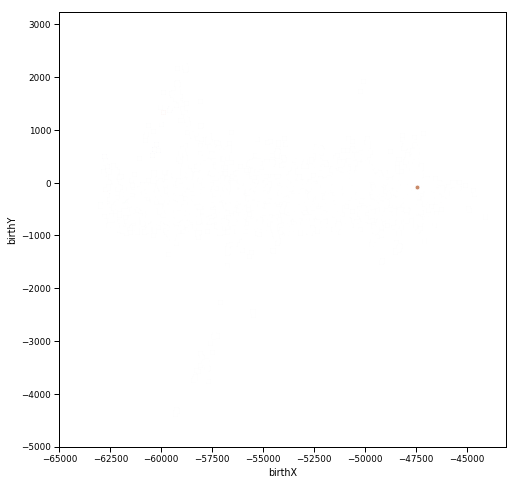

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
plt.xlim(*x_bounds)
plt.ylim(*y_bounds)


graph = plt.plot([], [], 'o')


def animate(t):
    include = migration_sub.query('(t_start <= @t) and (t_end > @t)')
    print(len(include))
    ##remove previous
    notinclude = migration_sub.query('(t_end <= @t)')
    graph = sns.scatterplot(data = notinclude, x = 'birthX', y = 'birthY', color = 'white')
    ##draw new (color by family)
    for i in migration_sub['last'].unique():
        graph = sns.scatterplot(data = include.query('last == @i'), \
                                x = 'birthX', y = 'birthY', color = colors[i])
    
    return graph

ani = animation.FuncAnimation(fig, animate, frames=t_frames, interval=interval)

# Save animation to video
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'
# out_file = 'plots/animated_population_release-%i.mpeg' % r
# ani.save(out_file)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=fps, metadata=dict(artist='Me'), bitrate=1800)
ani.save('ani.mp4', writer=writer)

In [25]:
ani

NameError: name 'ani' is not defined